# Великий и могучий русский язык в самых прослушиваемых песнях 2024 года

### Импорт библиотек

In [1]:
!pip install pymystem3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer 

import re
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pymystem3 import Mystem

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Загрузка  и обзор данных

In [3]:
data = pd.read_csv('/kaggle/input/top-100-ru-songs/top100_2024.csv', sep = ";", encoding = "cp1251")

In [4]:
data

,Rating,Artist,Lyrics,Genre
0,1,"Jakone, Kiliana",Эй эй\nАлё-алё связи снова нету\nЭтот холод тв...,хип-хоп
1,2,"Женя Трофимов, Комната культуры",Тяни лотерейный билет\nЧто б тамбур прокуренны...,поп
2,3,XOLIDAYBOY,А мы снова танцуем\nПоём под нирвану\nТвои поц...,поп
3,4,Wallem,"Я вижу по глазкам твоим, ты сильно скучаешь по...",поп
4,5,MORGENSHTERN,"Ты снова куришь, снова слёзы на твоих щеках\nО...",поп
...,...,...,...,...
89,93,MONA,"Ангел и демон, ангел и демон Ангел и демон, ан...",поп
90,94,FRIENDLY THUG 52 NGG,"Е, ха 2024, NGG, No Gletcher Gang, Санкт-Петер...",хип-хоп
91,95,WHITE GALLOWS feat. SCIRENA,"Разве можно сделать лучше? Я разливаю самбуку,...",хип-хоп
92,96,daryana,"Мне мало-мало, я так хочу кидаться влево-вправ...",хип-хоп


In [5]:
data['Rating'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97])

В нашем распоряжении совсем небольшой датасет, в который вошли русскоязычные песни из плейлиста "2024 в треках". В нем оставлена информация по 93 песням — у 7 из 100 самых прослушиваемых песен нет слов совсем, их тексты написаны на иностранном языке или лирика отсутствует внутри сервиса.

Кроме текста песни имеется также информация о её месте в чарте (признак `Rating`) и её исполнителе (признак `Artist`) и жанре (`Genre`).

### Лемматизация текста

Прежде чем считать слова, их необходимо лемматизировать, т.е. привести к нормальной форме. Для лемматизации текстов воспользуемся библиотекой pymystem3.

In [6]:
lemmatizer = Mystem() # создаем объект класса Mystem

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [7]:
lemmatizer.lemmatize("останусь")  # проверим как работает лемматизатор на случайной слове 
                               # из первой песни в чарте

['оставаться', '\n']

In [8]:
def lemmatize_text(text, r_mask = r'[^а-яА-ЯёЁ]'):
    """
    Функция предназначена для лемматизации текста. Перед использованием необходимо импортировать библиотеку pymystem3 и 
    создать объект класса Mystem.
    
    На вход принимает текст text, который сначала приводится к нижнему регистру, затем лемматизируется и очищается
    от знаков препинания и латинский букв посредством регулярного выражения r_mask. При необходимости работы с
    англоязычным текстом значение регулярного выражения по умолчанию можно переопределить.
    """
    text = text.lower()
    
    lemm_text = "".join(lemmatizer.lemmatize(text))
   
    cleared_text = re.sub(r_mask, ' ', lemm_text)
    
    return " ".join(cleared_text.split())

In [9]:
%%time

data['lemm_text'] = data['Lyrics'].apply(lemmatize_text)

CPU times: user 145 ms, sys: 23.1 ms, total: 168 ms
Wall time: 1.32 s


In [10]:
data_lem = data.copy()
data_lem.to_csv("data_lem.csv", index=False)

In [11]:
data_lem.head()

,Rating,Artist,Lyrics,Genre,lemm_text
0,1,"Jakone, Kiliana",Эй эй\nАлё-алё связи снова нету\nЭтот холод тв...,хип-хоп,эй эй але але связь снова нету этот холод твой...
1,2,"Женя Трофимов, Комната культуры",Тяни лотерейный билет\nЧто б тамбур прокуренны...,поп,тянуть лотерейный билет что б тамбур прокурива...
2,3,XOLIDAYBOY,А мы снова танцуем\nПоём под нирвану\nТвои поц...,поп,а мы снова танцевать петь под нирвана твой поц...
3,4,Wallem,"Я вижу по глазкам твоим, ты сильно скучаешь по...",поп,я видеть по глазок твой ты сильно скучать по м...
4,5,MORGENSHTERN,"Ты снова куришь, снова слёзы на твоих щеках\nО...",поп,ты снова курить снова слеза на твой щека опять...


### Несовершенная методология

In [12]:
data_lem['Artist'].value_counts().head(10)

Artist
MACAN                   6
XOLIDAYBOY              4
Toxi$                   3
Miyagi & Эндшпиль       3
Xcho                    2
FRIENDLY THUG 52 NGG    2
Egor Kreed              2
Basta                   2
Монеточка               2
daryana                 2
Name: count, dtype: int64

Лемматизированный текст каждой песни сохранен в новую колонку. Выведим один на экран для примера.

In [13]:
print(data_lem['lemm_text'][1])

тянуть лотерейный билет что б тамбур прокуривать быть у мы с ты выигрывать нет лишь бы просто дорога к ты не забывать и стакан граненый шум трещать как любовь по шов я каждый вокзал просить не пускать я к поезд и рельс сердечный пульс железный струна душа наверное скоро вернуться ты пожалуйста только писать я и тянуться город я в каждый из они бывать мы ссорить поезд но мирить мы пустой вокзал чтоб быть с ты навсегда я сразу билет взять мы ссорить поезд но мирить мы пустой вокзал ссорить поезд меняться в окно день зачеркнуть в календарь проводница здороваться лень но сейчас они главный в наш судьба и пестреть заголовок газета что против судьба не пойти любовь в этот город нет но я знать что ты я ждать и рельс сердечный пульс железный струна душа наверное скоро вернуться ты пожалуйста только писать я и тянуться город я в каждый из они бывать мы ссорить поезд но мирить мы пустой вокзал чтоб быть с ты навсегда я сразу билет взять мы ссорить поезд но мирить мы пустой вокзал мы ссорить поез

На примере отлично видно, что некоторые слова не несут смысловой нагрузки (например, местоимения), другие многократно повторяются — хотя бы потому, что у большинства слов есть припевы. 

От первой группы слов затрудняющий анализ текста мы избавимся с помощью библиотеки `nltk` и списка русских стоп-слов, а чтобы снизить вклад повторов и припевов сделаем из каждого текста множество и объединим заново в строку.

In [14]:
def lemm_set(text):
    set_of_words = set(text.split())
    return " ".join(set_of_words)

In [15]:
#data_lem['lemm_text'][1].split()

In [16]:
%%time

data_lem['lemm_set_text'] = data_lem['lemm_text'].apply(lemm_set)

CPU times: user 5.57 ms, sys: 919 µs, total: 6.49 ms
Wall time: 6.15 ms


In [17]:
data_lem['lemm_set_text'][1]

'пожалуйста наш каждый бывать что пульс нет ссорить просить тянуться по и главный железный трещать зачеркнуть взять быть пойти пускать меняться мы душа билет чтоб дорога прокуривать лишь я бы заголовок просто б наверное вернуться проводница тянуть лотерейный лень пустой мирить только судьба сердечный ты любовь этот из они здороваться навсегда ждать у шум газета как но сейчас тамбур город забывать струна против окно к поезд рельс пестреть писать в выигрывать календарь сразу не скоро день шов стакан с вокзал граненый знать'

От повторов избавились. Теперь очередь за стоп-словами.



In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words = set(stopwords.words('russian')) # создаем набор русских слов с применением nltk

## Подсчет слов

Создадим корпус текстов из подготовленной лирики:

In [20]:
corpus = data_lem['lemm_set_text'].values.astype('U')

Теперь создаем объект счетчика и передаем ему стоп-слова:

In [21]:
count_vect = CountVectorizer(stop_words=list(stop_words))

In [22]:
bow = count_vect.fit_transform(corpus) # bag of words

In [23]:
word_list = count_vect.get_feature_names_out()           # список всех использованных слов
count_list = bow.toarray().sum(axis=0)               # количество использований

used_words = dict(zip(word_list,count_list))         # словарь использованных слов с количесвтом использований

In [24]:
used_words_df = pd.DataFrame(used_words.items(), columns = ['word', 'count'])

## Анализ данных

In [25]:
used_words_df.head()

,word,count
0,абонемент,1
1,абонент,1
2,абьюзер,2
3,авто,1
4,автомат,1


In [26]:
used_words_df.describe()

,count
count,2964.000000
mean,2.253374
std,3.560609
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,62.000000


И так у нас есть словарь из 2487 слов, которые использовали артисты в самых прослушиваемых песнях 2022 года. Большинство из них использовали всего по разу — но слово-чемпион — целых 62 раза. 

In [27]:
used_words_df[used_words_df['count'] == 62]

,word,count
2945,это,62


In [28]:
print(used_words_df.sort_values('count', ascending = False))

           word  count
2945        это     62
2553       твой     60
265        весь     49
2810     хотеть     42
845       знать     42
...         ...    ...
1191      мгимо      1
1193         мд      1
1194   медленно      1
1195  медленный      1
2963         яя      1

[2964 rows x 2 columns]


In [29]:
used_words_df.sort_values('count', ascending = False).head(20)

,word,count
2945,это,62
2553,твой,60
265,весь,49
2810,хотеть,42
845,знать,42
1152,любовь,41
2232,свой,30
1266,мочь,30
449,глаз,29
2357,снова,28


In [30]:
data_used_word = used_words_df.sort_values('count', ascending = False)
data_used_word.to_csv("data_used_word.csv", index=False)

### Облако слов

In [31]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

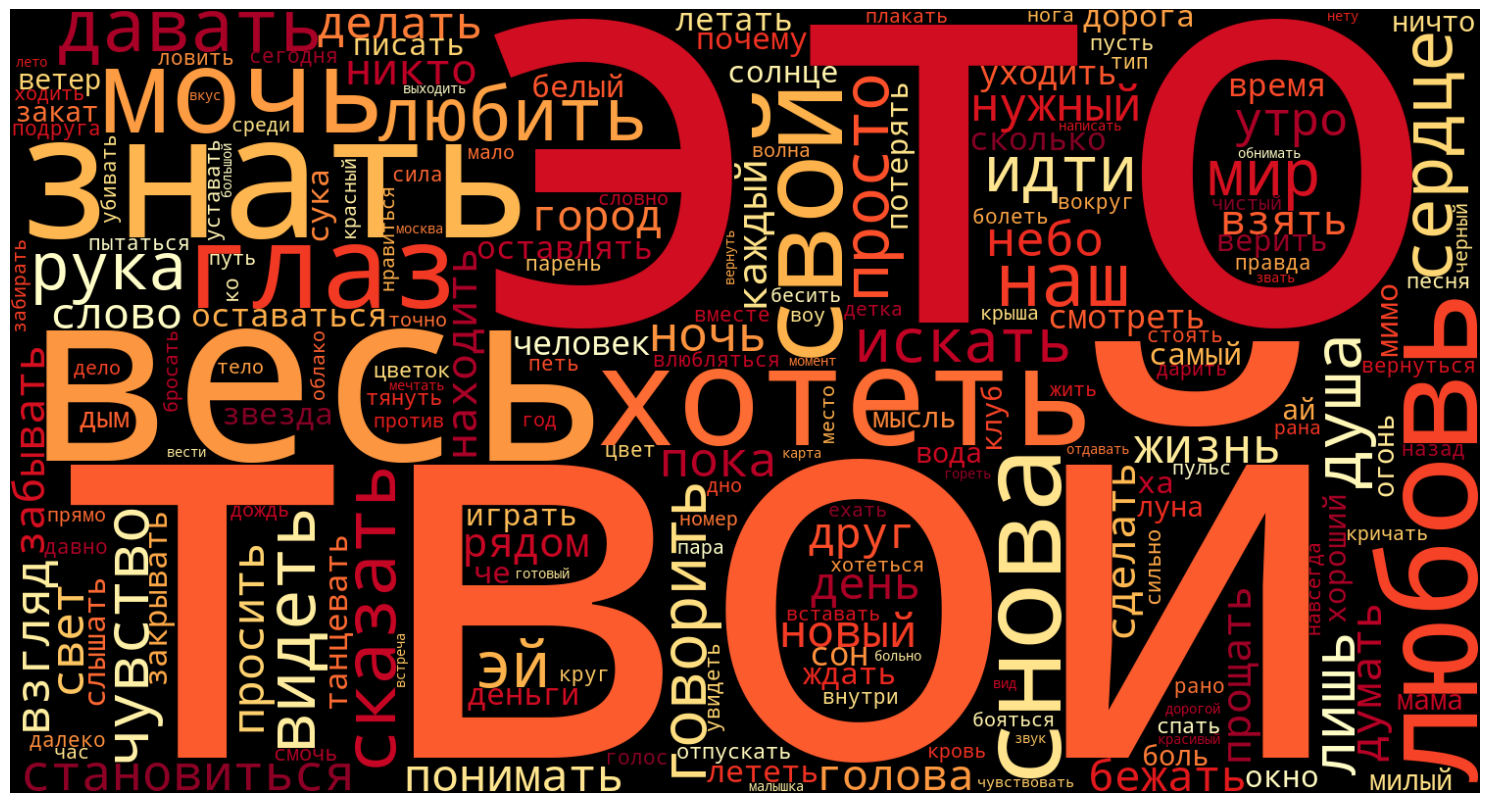

In [33]:
common = used_words
wc = WordCloud(width=1500, height=800, background_color="black",
               colormap='YlOrRd',
               collocations=False, min_font_size=7).generate_from_frequencies(used_words)
plt.figure(figsize = (15,20))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()